In [1]:
from google.colab import drive
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [0]:
from fastai import *
from fastai.vision import *
from fastai.vision.transform import *
from fastai.callbacks.hooks import *

import os
import shutil 
from tqdm import tqdm_notebook as tqdm
import  numpy as np
import pandas as pd

In [0]:
data_root = "/content/gdrive/My Drive/plates/plates/"

In [0]:
bs = 4 #best4,244
sz = 244

In [0]:
tfms = get_transforms(max_lighting=.65, max_zoom =1.2, max_warp =.4, #do_flip=True, flip_vert=True,
                      xtra_tfms = [
                                   rgb_randomize(thresh =.3, p=0.2) ])
                     

data = ImageDataBunch.from_folder(os.path.join(data_root), train="train",
                                  #valid_pct=.1,
                                  test = 'test',
                                  valid = 'valid',
                                  bs=bs,
                                  #seed=111,
                                  ds_tfms=tfms,
                                  #[tfms, tfms_v],
                                  size=sz, num_workers=4).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy, callback_fns=[ShowGraph])

In [0]:
learn.load(data_root + '962');


In [0]:
#log_preds, y = learn.TTA(ds_type=DatasetType.Test)
#log_preds.shape

##TSNE


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torchvision.models as models
import glob
from PIL import Image
import torch
from sklearn.manifold import TSNE
import random
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

random.seed(2)
np.random.seed(2)
torch.manual_seed(2)
torch.cuda.manual_seed(2)
torch.backends.cudnn.deterministic = True

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [0]:
test_folder = data_root + 'test'
test_pictures = []
for filename in sorted(glob.glob(f'{test_folder}/*')):
    im=Image.open(filename)
    try:
        assert im.mode == 'RGB', 'Image channel order is not RGB.'
    except:
        continue
    np_im = np.array(im)
    if np_im.shape[0] > np_im.shape[1]:
        np_im = np.swapaxes(np_im, 0, 1)
    test_pictures.append(np.array(im))

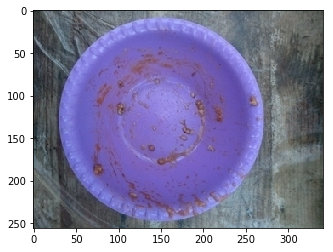

In [97]:
plt.imshow(test_pictures[0])

In [0]:

loc = torch.load(data_root + '962.pth')
body = create_body(models.resnet50, True, None)
data_classes = 2
nf = callbacks.hooks.num_features_model(body) * 2
head = create_head(nf, data_classes, None, ps=0.5, bn_final=False)
model = nn.Sequential(body, head).to(device)

model.load_state_dict(loc['model'])
model.eval();

In [0]:
model = models.resnet18(pretrained=True).to(device)
model.eval();

In [0]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

result = []

for i in test_pictures:
    i_tensor = torch.from_numpy((i / 255. - mean) / std).float().unsqueeze(0).permute(0, 3, 1, 2).to(device)
    
    result.append(model(i_tensor).detach().cpu().numpy())

In [0]:
result = np.array(result).squeeze()

In [0]:
#result_embedded = TSNE(n_components=2, random_state=3, perplexity=20).fit_transform(result)

In [0]:
r = [380, 270, 230, 225, 200, 170, 140, 40, 10]

perplexity 380


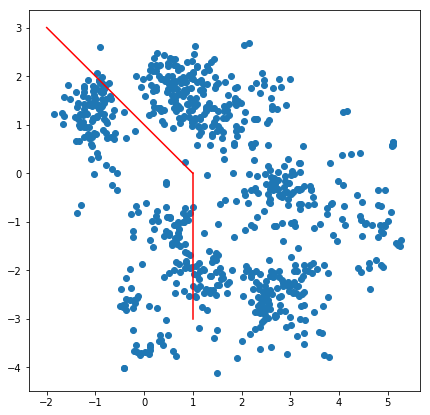

perplexity 270


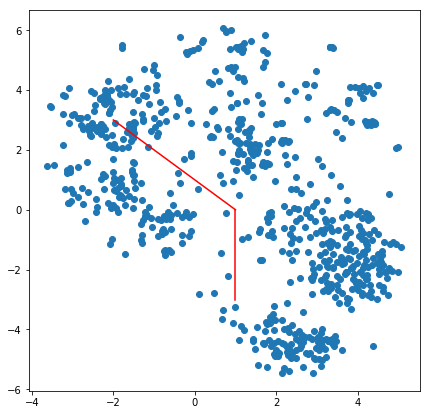

perplexity 230


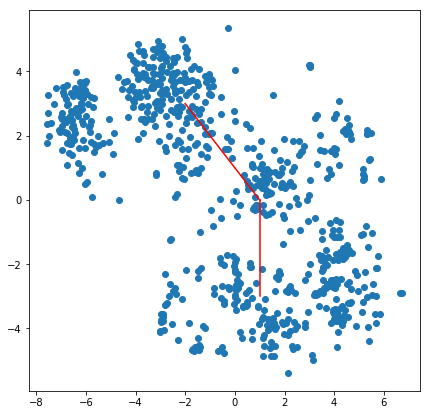

perplexity 225


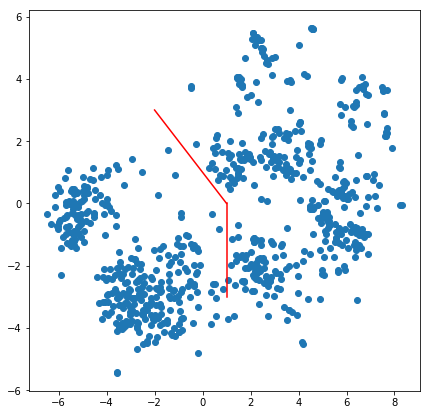

perplexity 200


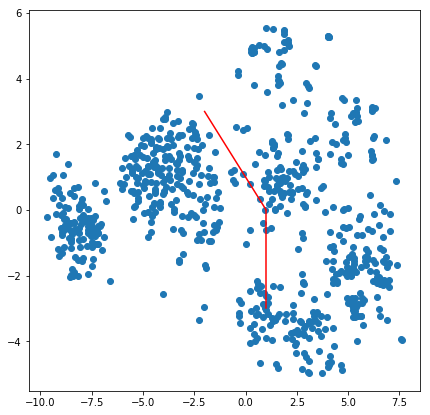

perplexity 170


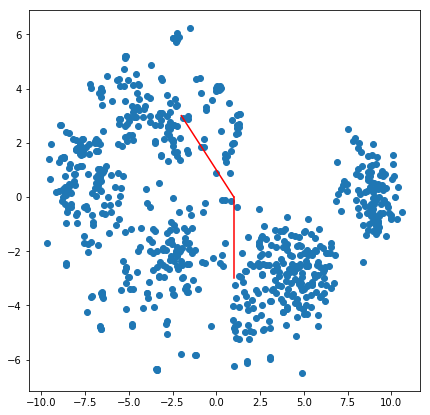

perplexity 140


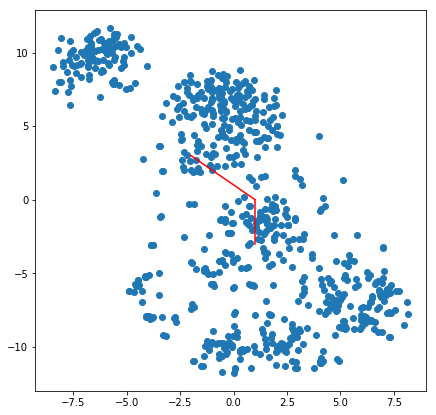

perplexity 40


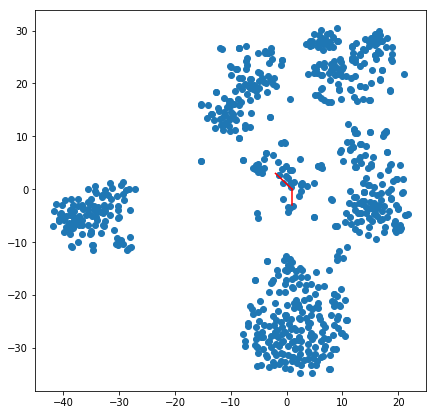

perplexity 10


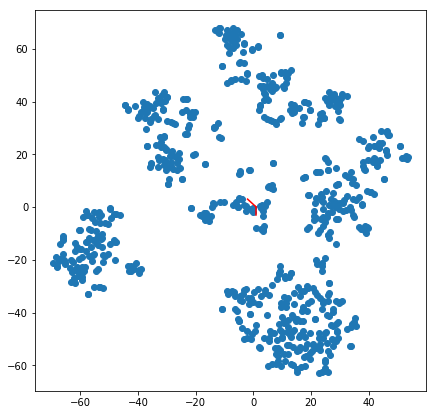

In [313]:
for i in r:
    result_embedded = TSNE(n_components=2, random_state=3, perplexity=i).fit_transform(result)
    print('perplexity' ,i)
    plt.figure(figsize=(7, 7))
    x = result_embedded[:,0]
    y = result_embedded[:,1]
    plt.scatter(x, y)

    xl = np.linspace(-2, 1, 100)
    yl = -xl + 1
    plt.plot(xl, yl, '-r')

    yl = np.linspace(-3, 0, 100)
    xl = yl-yl+1
    plt.plot(xl, yl, '-r')

    plt.show()

perplexity 170


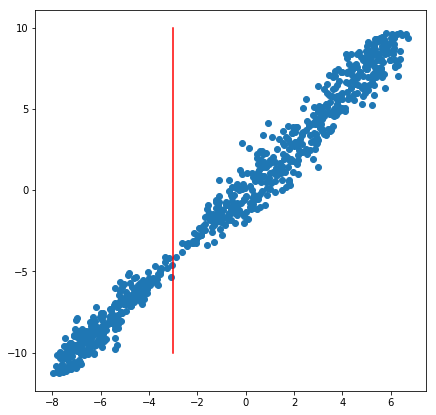

In [282]:
i = 170
treshold = -2.7
result_embedded = TSNE(n_components=2, random_state=3, perplexity=i).fit_transform(result)
print('perplexity' ,i)
plt.figure(figsize=(7, 7))
x = result_embedded[:,0]
y = result_embedded[:,1]
plt.scatter(x, y)

yl = np.linspace(-10, 10, 100)
xl = -3 +  0 * yl #-xl + 1
plt.plot(xl, yl, '-r')

#yl = np.linspace(-10, 10, 100)
#xl = 2*yl-2
#plt.plot(xl, yl, '-r')

plt.show()

In [242]:
for i in [2,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.,2.9,3,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9]:
    print(i, result_embedded[y<=-i].shape)

2 (268, 2)
2.1 (265, 2)
2.2 (264, 2)
2.3 (263, 2)
2.4 (261, 2)
2.5 (261, 2)
2.6 (261, 2)
2.7 (260, 2)
2.0 (268, 2)
2.9 (260, 2)
3 (259, 2)
3.1 (259, 2)
3.2 (257, 2)
3.3 (257, 2)
3.4 (255, 2)
3.5 (254, 2)
3.6 (254, 2)
3.7 (251, 2)
3.8 (248, 2)
3.9 (246, 2)


In [283]:
result_embedded[x<=treshold].shape

(260, 2)

In [284]:
df = pd.read_csv(data_root + 'sample_submission.csv')
df.head()

,id,label
0,0,dirty
1,1,dirty
2,2,dirty
3,3,dirty
4,4,dirty


In [0]:
df['label'] = (x<=treshold)

In [0]:
df['label'] = df['label'].map(lambda x: 'cleaned' if x else 'dirty')

In [0]:
df.to_csv(data_root + 'out.csv', index=False)